### Creating a shots map in python

**Shots Map**  is simply a representation for all the shots attempted by  a player or a team by plotting the position at which the player toke the shot and denote wheather the shot was on or off target

**shots Map** is an important indicator of the team offensive game (The density of the shots, the proximity to the target etc..)

##### Data:
for this use case I used data that I generated from an extended highlights video on yotube for the game between Iiverpool and Real Madrid in 2022 the UCL Final.
The dataset has been generated using Video Event Tagger developped by fcpython.com




#### Importing library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch, VerticalPitch

#### Importing data

In [2]:
shots=pd.read_csv("shots.csv")
shots.head(5)

,Team,Event,Mins,Secs,X,Y,outcome
0,Liverpool,Shot,1,30,5,40,on target
1,Liverpool,Shot,1,38,15,56,on target
2,Liverpool,Shot,1,45,13,28,off target
3,Liverpool,Shot,2,0,11,58,on target
4,Liverpool,Shot,2,34,30,31,off target


##### Adjusting the coordinates to align with the statsbomb pitch dimensions

In [3]:
shots["X"]=100-shots["X"]
shots["Y"]=100-shots["Y"]

In [4]:
shots["X"]=shots["X"]*1.2
shots["Y"]=shots["Y"]*0.8
shots.head(5)

,Team,Event,Mins,Secs,X,Y,outcome
0,Liverpool,Shot,1,30,114.0,48.0,on target
1,Liverpool,Shot,1,38,102.0,35.2,on target
2,Liverpool,Shot,1,45,104.4,57.6,off target
3,Liverpool,Shot,2,0,106.8,33.6,on target
4,Liverpool,Shot,2,34,84.0,55.2,off target


Text(0.5, 1.0, 'Liverpool shots map against Real madrid in the UCL final 2022 ')

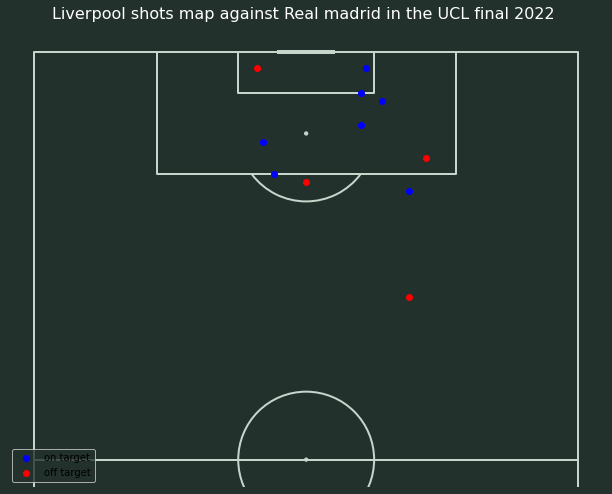

In [5]:
# setting up the canvas
fig ,ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#Plotting the pitch
pitch = VerticalPitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(16, 11),
              constrained_layout=True, tight_layout=False,half=True)
pitch.draw(ax=ax)

# Flipping the y axis to start from 0 to 80
#plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
shots_on=shots[shots["outcome"]=="on target"]
plt.scatter(shots_on["Y"],shots_on["X"],c='blue',label="on target")
shots_off=shots[shots["outcome"]=="off target"]
plt.scatter(shots_off["Y"],shots_off["X"],c='red',label="off target")


# setup the legend and title
ax.legend( fontsize=10, loc='lower left',facecolor='#22312b')
plt.title("Liverpool shots map against Real madrid in the UCL final 2022 ",color="white",size=16)

#### From the map we can see that Liverpool had shots from  a really good positions and lots of them were shots on target but this is not conclusive indication of the quality of these chances or shots because there are many other factors to consider like the defenders position, the shoter body positioning, the ball control etc.. So, for the quality of the chances the XG is a much better metric  